In [2]:
import numpy as np
import sympy as sym
from sympy import symbols, cos, diff
import matplotlib.pyplot as plt

In [3]:
X= sym.Symbol("x",real=True)
Y = sym.Symbol("y",real=True)
Z= X + sym.I*Y
Z

x + I*y

In [4]:
f = Z**3 - 1.

In [5]:
F=[sym.re(f),sym.im(f)]

In [14]:
def GetJacobian(G):
    
    dim = len(G)
    
    J = sym.zeros(2,2)
    
    J[0,0] = sym.diff(F[0],X,1)
    J[0,1] = sym.diff(F[0],Y,1)
    J[1,1] = sym.diff(F[1],Y,1)
    J[1,0] = sym.diff(F[1],X,1)
        
    return J
J=GetJacobian(F)

In [15]:
FF=sym.lambdify([X,Y],F,"numpy")
Fj = sym.lambdify([X,Y],J,"numpy")

In [89]:

sema=np.array([[1/2],[1/2]])
semb=np.array([[-1/2],[-np.sqrt(3)/2]])
semc=np.array([[1],[0]])



In [107]:
def Newton(sem,Fj,FF):
  sem1=sem
  anterior=0
  while np.linalg.norm(sem1-anterior) > 1*10**(-7):
    jacobiano_evaluado=Fj(sem1[0,0],sem1[1,0])
    jacobianoinv=np.linalg.inv(jacobiano_evaluado)
    
    Vector_F=np.zeros((len(jacobianoinv),1))
    for i in range(len(jacobianoinv)):
      ecuacion=FF(sem1[0],sem1[1])
      Vector_F[i]=ecuacion[i]
    
    anterior=sem1
    sem1=sem1-(jacobianoinv @ Vector_F)
  return sem1
print(Newton(sema,Fj,FF))
print(Newton(semb,Fj,FF))
print(Newton(semc,Fj,FF))
z0=Newton(sema,Fj,FF)
z1=Newton(semb,Fj,FF)
z2=Newton(semc,Fj,FF)



[[-0.5      ]
 [ 0.8660254]]
[[-0.5      ]
 [-0.8660254]]
[[1.]
 [0.]]


In [113]:
N=300
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)

In [114]:
Fractal = np.zeros((N,N), np.int64)

In [118]:
for i in range(N):
  for j in range(N):
    Numero=Newton(np.array([[x[i]],[y[j]]]),Fj,FF)
    if Numero[1]>0:
      Fractal[i,j]=20
    elif Numero[1]<0:
      Fractal[i,j]=100
    elif Numero[0]>0:
      Fractal[i,j]=255

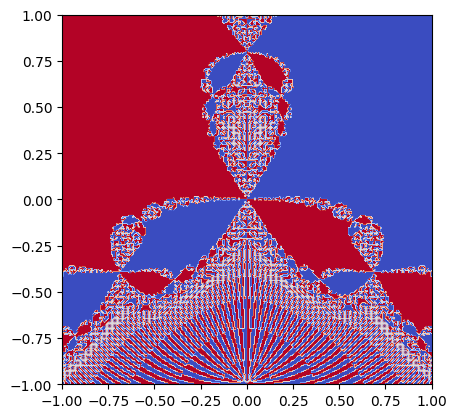

In [119]:
plt.imshow(Fractal, cmap="coolwarm" ,extent=[-1,1,-1,1])